Name : Harsh Kasundra

Roll No : U23AI125

DS Lab 2


# Objective

 The goal of this lab is to perform exploratory data analysis using statistical techniques
 to understand the characteristics, distribution, and relationships in NYC yellow taxi trip
 data. You will compute descriptive statistics, visualize data patterns, and apply inferential
 statistics to draw conclusions

# Dataset Description
 The dataset contains trip-level data of yellow taxi rides in NYC. Each record includes at
tributes such as pickup/dropoff time, trip distance, fare amount, passenger count, payment
 type, and more. Refer to the attached data dictionary for field definitions.

 # Part A: Descriptive Statistics
 1. **Univariate Analysis**

 For the following columns, compute and interpret:
 • Passenger count
 • Trip distance
 • Fare amount
 • Total amount
 • Tip amount
 • Extra
 Tasks:
 • Mean, median, mode
 • Minimum, maximum
 1
• Standard deviation, variance
 • Skewness and kurtosis
 • Count and number of missing values

In [1]:
#Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
#Loading the dataset

df = pd.read_csv("yellow_tripdata_sample.csv")

columns = ['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']

In [3]:
#preview
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [4]:
#Univariate analysis output

for col in columns:
    data = df[col].dropna()  # ignore missing values for calculations
    print(f"--- {col.upper()} ---")
    print("Mean:", data.mean())
    print("Median:", data.median())
    print("Mode:", data.mode().iloc[0] if not data.mode().empty else 'No mode')
    print("Min:", data.min())
    print("Max:", data.max())
    print("Std Dev:", data.std())
    print("Variance:", data.var())
    print("Skewness:", data.skew())
    print("Kurtosis:", data.kurt())
    print("Count:", data.count())
    print("Missing Values:", df[col].isna().sum())
    print("\n")

--- PASSENGER_COUNT ---
Mean: 1.5819095477386935
Median: 1.0
Mode: 1.0
Min: 0.0
Max: 6.0
Std Dev: 0.9116253266978481
Variance: 0.8310607362769583
Skewness: 1.6643298072083297
Kurtosis: 2.827890429140433
Count: 995
Missing Values: 0


--- TRIP_DISTANCE ---
Mean: 2.8904723618090453
Median: 1.96
Mode: 0.9
Min: 0.0
Max: 23.9
Std Dev: 3.1252678079193874
Variance: 9.767298871217253
Skewness: 3.2881722319456728
Kurtosis: 13.975566356327981
Count: 995
Missing Values: 0


--- FARE_AMOUNT ---
Mean: 18.27859296482412
Median: 14.2
Mode: 6.5
Min: -47.8
Max: 180.0
Std Dev: 14.916422223234415
Variance: 222.49965194180155
Skewness: 3.0124402462143554
Kurtosis: 20.739872581623793
Count: 995
Missing Values: 0


--- TOTAL_AMOUNT ---
Mean: 26.84753768844221
Median: 22.2
Mode: 16.32
Min: -52.8
Max: 217.2
Std Dev: 18.09201780111972
Variance: 327.32110811603286
Skewness: 3.025343707163598
Kurtosis: 20.194070844679576
Count: 995
Missing Values: 0


--- TIP_AMOUNT ---
Mean: 3.4831457286432164
Median: 3.0
Mode:

2. **Visualizations**

 Create at least three of the following for selected columns:
 • Histogram and Frequency Polygon
 • Box Plot and Violin Plot
 • Density Plot
 • Bar Chart (for categorical columns like Payment type, RateCodeID)
 • Pie Chart (for categorical proportions like VendorID or Store and fwd flag)

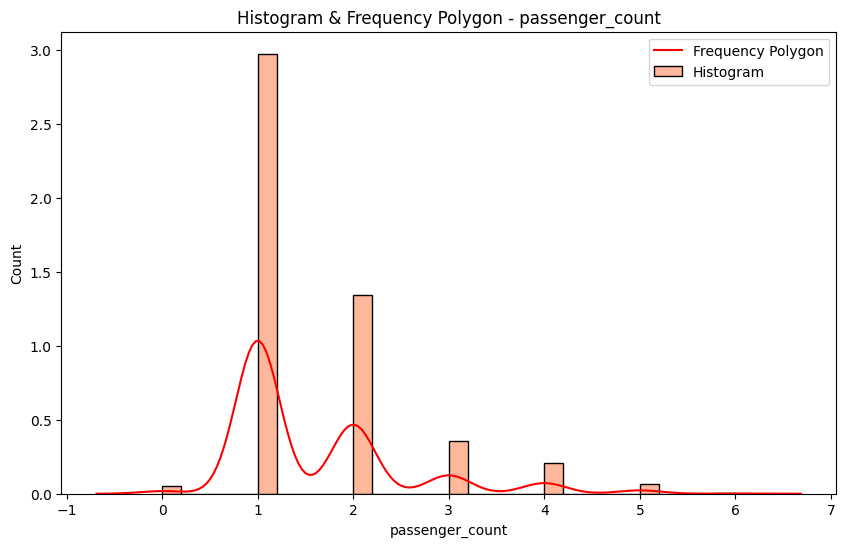

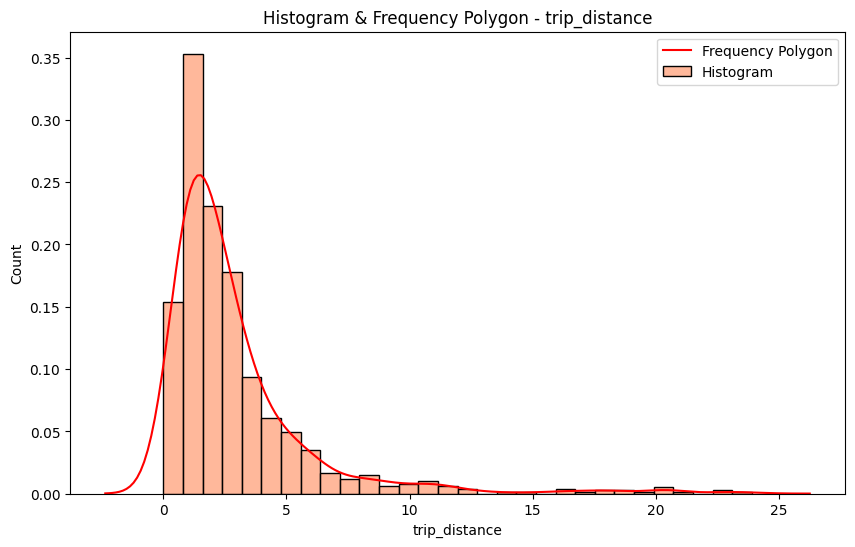

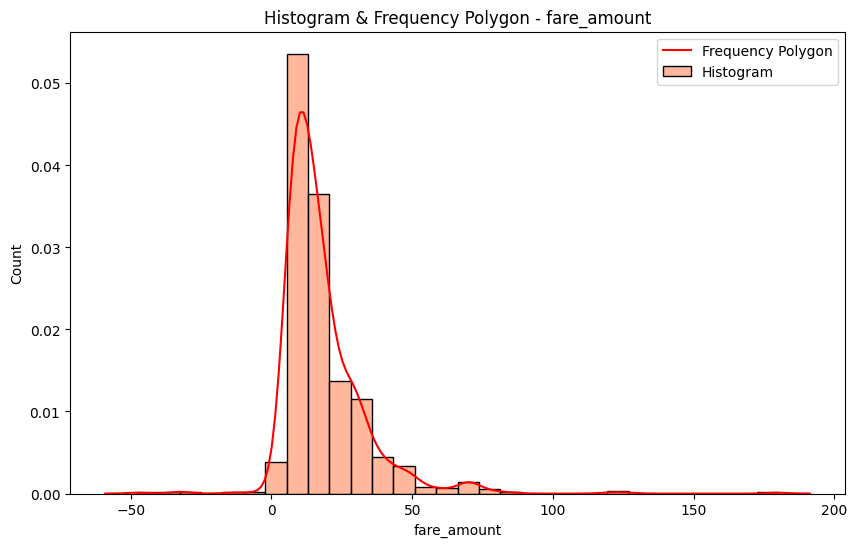

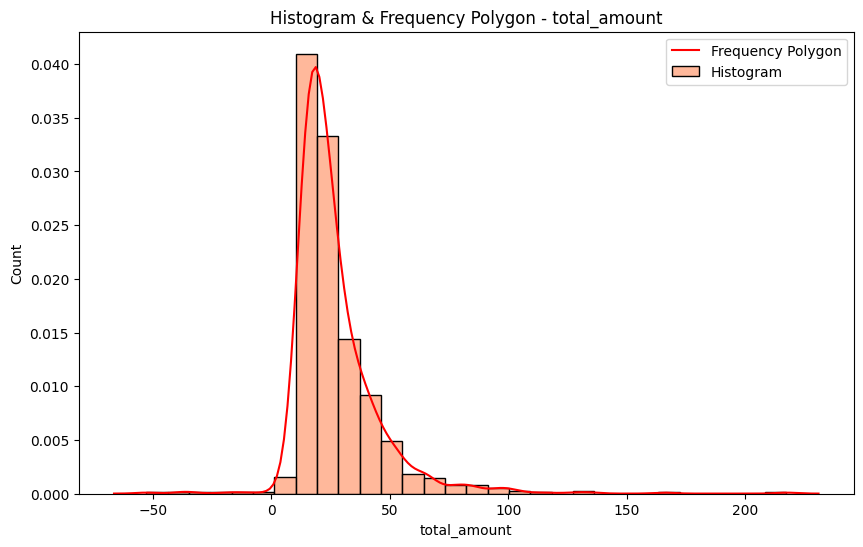

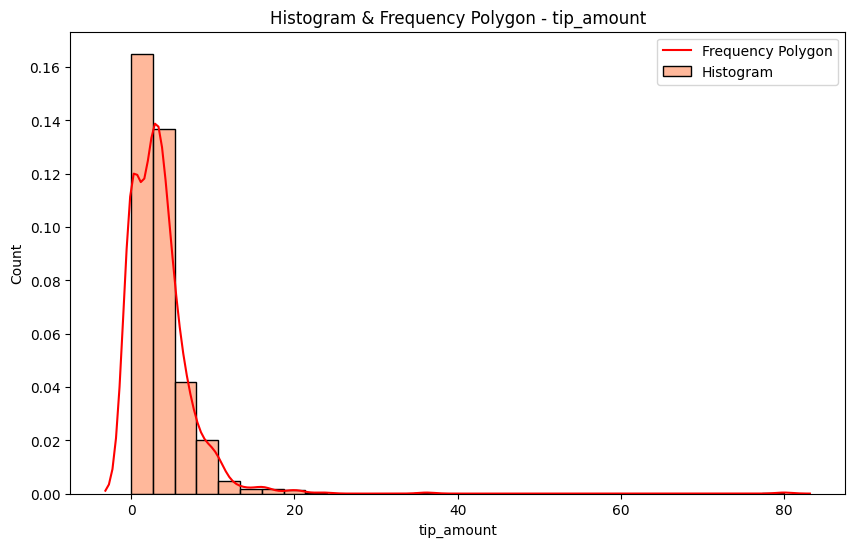

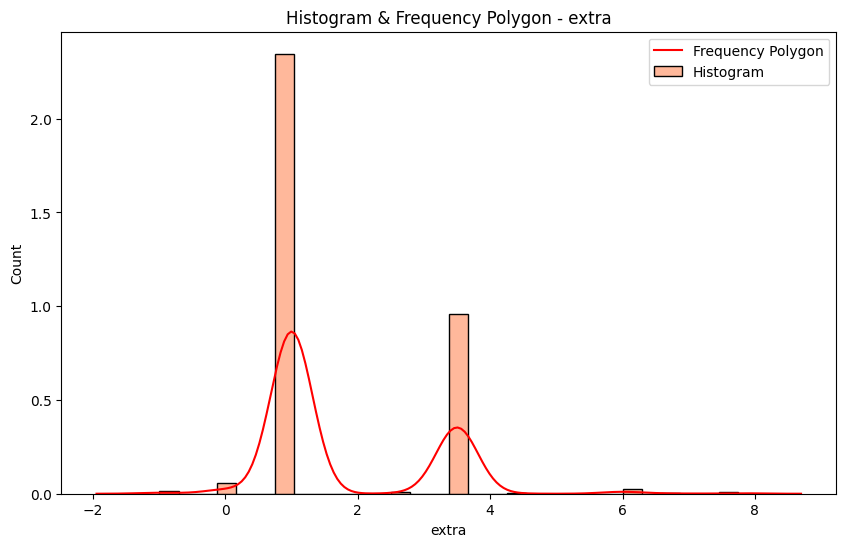

In [5]:
#Histogram and freq polygon

for col in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=30, kde=False, color='lightsalmon', stat='density', label='Histogram')
    sns.kdeplot(df[col], color='red', label='Frequency Polygon')
    
    plt.title(f"Histogram & Frequency Polygon - {col}")
    plt.ylabel("Count")
    plt.legend()
    plt.show()


***Inferences from histograms***

Most passenger counts are 1 or 2, showing solo or paired travel. Values above 6 may be invalid.

Trip distances are usually under 5 miles, indicating short city rides. Right-skewed with few long trips.

Fare and total amounts peak around $5–$15 and follow a similar right-skewed pattern. High values may be long trips or outliers.

Tip amounts have a strong peak at $0, meaning many don't tip. Most tips are small, with few large ones.

Extras show discrete peaks at known surcharges (like $0.5 or $1), with a few unusual values suggesting potential data errors.

*Overall*, most columns are right-skewed, with clear outliers and logical peaks that reflect typical NYC taxi behavior.



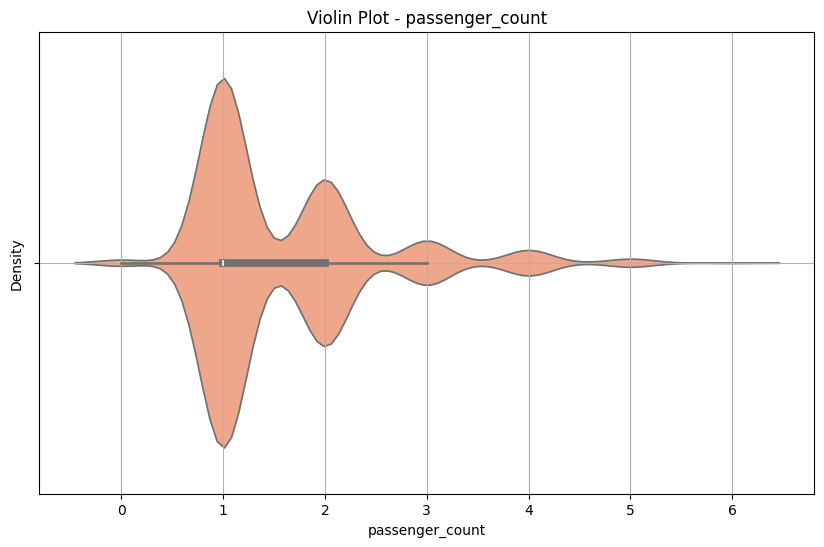

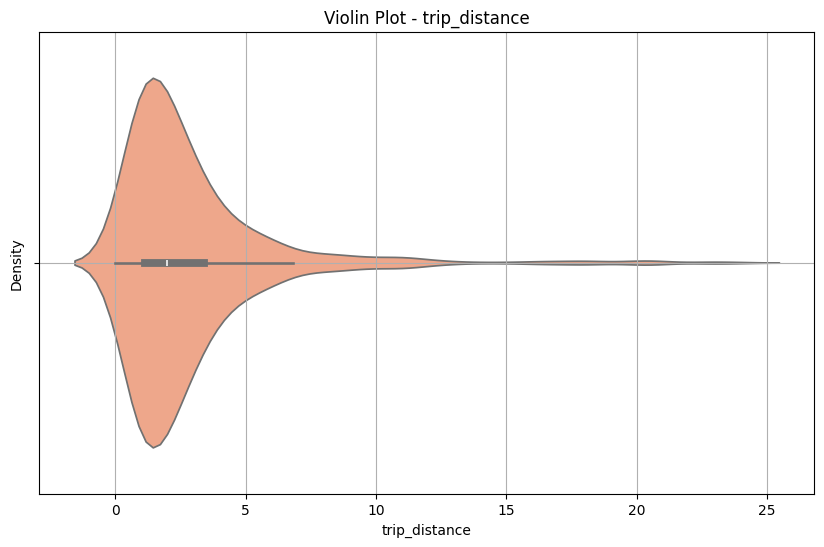

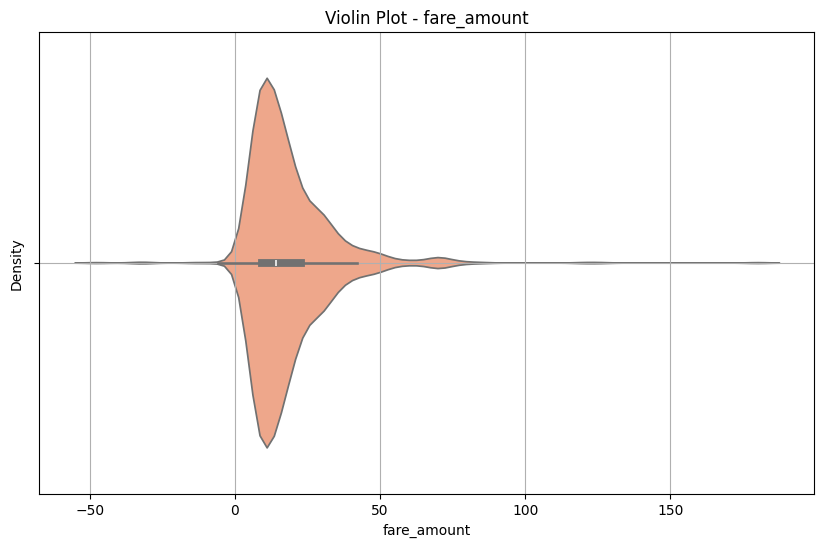

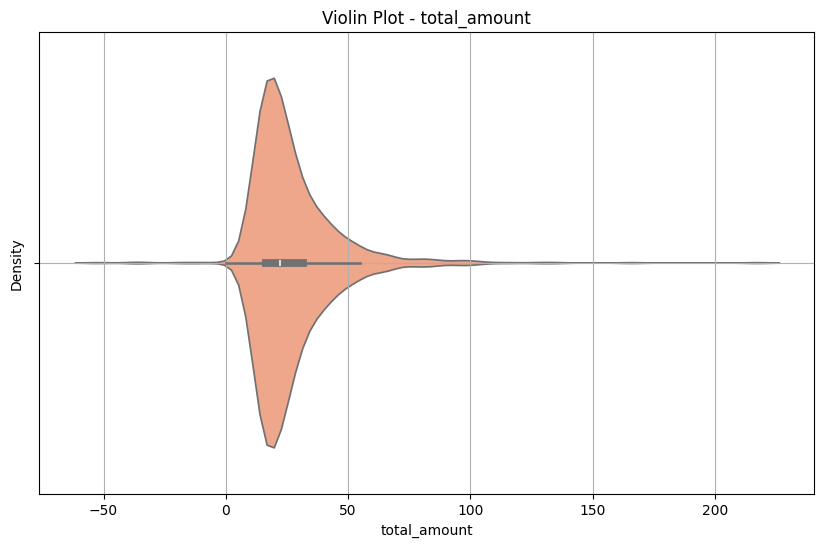

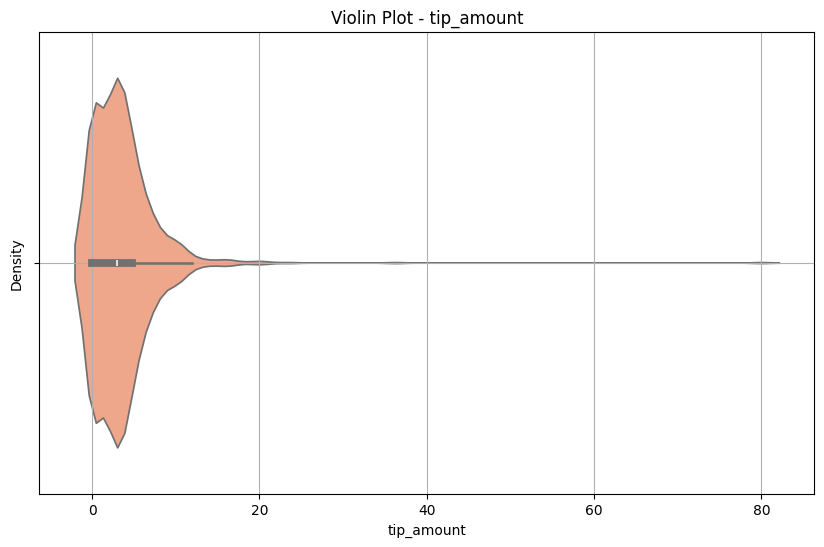

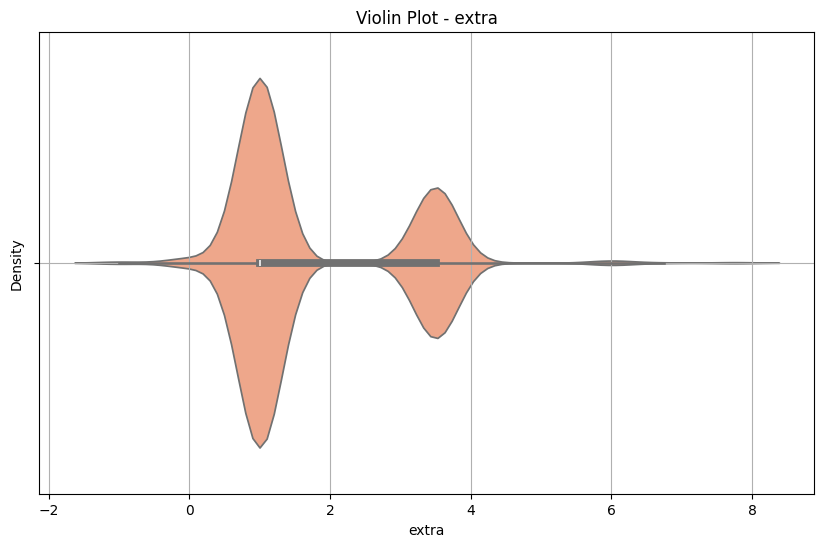

In [6]:
#Violin Plot

for col in columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df[col].dropna() , color='lightsalmon')
    plt.title(f"Violin Plot - {col}")
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()
    

***Inferences from Violin plots***

Most distributions (like trip_distance, fare_amount, total_amount) are heavily concentrated near the lower end, with long tails on the right, confirming right skew.

Violin width shows where data is dense — e.g., fare amounts are tightly packed around $7–$15.

Tip amount and extra show discrete bands, as many tips are $0 or round values, and extras are fixed surcharges.

Passenger count has clear spikes at 1 and 2, with almost no spread at higher values.

C:\Users\Asus\AppData\Local\Temp\ipykernel_13512\2326745218.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=df, palette='pastel' ,  order=df['payment_type'].value_counts().index)


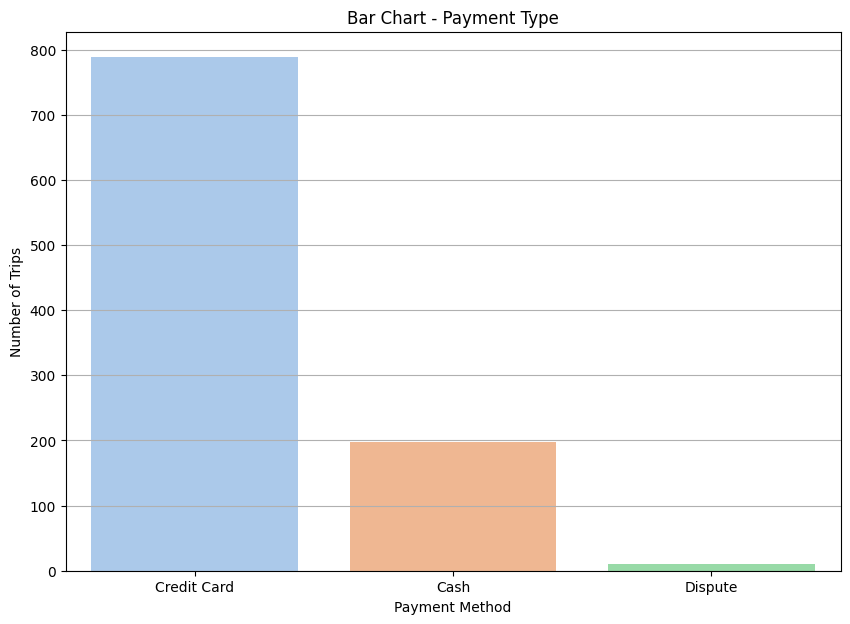

In [7]:
#Bar chart for payment_type

#mapping numbers with actual payment modes

payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided'
}

# Apply mapping if not already mapped
if df['payment_type'].dtype in ['int64', 'float64']:
    df['payment_type'] = df['payment_type'].map(payment_mapping)

# Drop missing (unmapped) values for clean plot
df_payment = df.dropna(subset=['payment_type', 'VendorID'])


#plot the mapped data
plt.figure(figsize=(10, 7))
sns.countplot(x='payment_type', data=df, palette='pastel' ,  order=df['payment_type'].value_counts().index)
plt.title("Bar Chart - Payment Type")
plt.xlabel("Payment Method")
plt.ylabel("Number of Trips")
plt.grid(axis='y')
plt.show()

***Inference from bar chart***

Credit Card is the most commonly used payment method.

Cash is the second most frequent, showing that both digital and cash transactions are prevalent.

Other methods like Dispute, No Charge, and Voided are rare, indicating exceptional cases or data issues.

The distribution suggests a strong preference for card payments among NYC taxi riders.

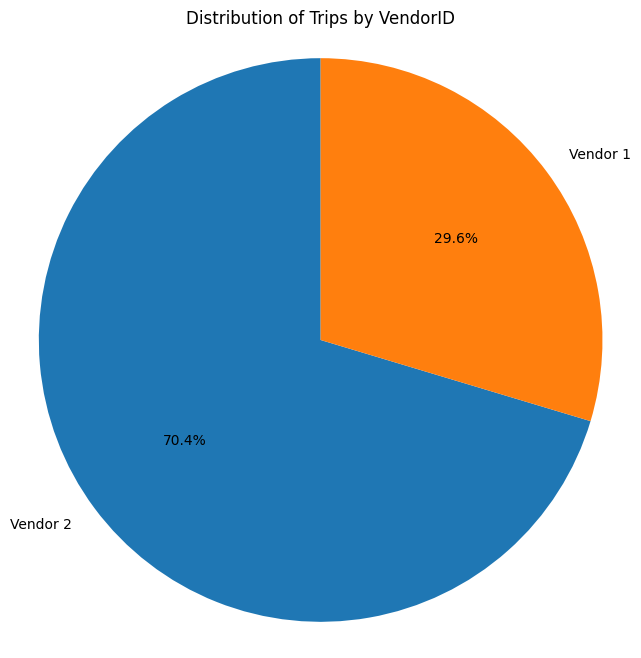

In [8]:
# Pie chart for vendorID

## Count values
vendor_counts = df['VendorID'].value_counts()
labels = [f"Vendor {int(i)}" for i in vendor_counts.index]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(vendor_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Trips by VendorID")
plt.axis('equal')  # Make the pie chart a circle
plt.show()


***Inference fromm pie chart***

Vendor 1 handles 29.6% of trips, significantly less than Vendor 2.

Vendor 2 accounts for 70.4% of all trips, showing a dominant market share.

This indicates that Vendor 2 is the preferred or more widely used vendor, possibly due to larger fleet size, better coverage, or service quality.

The absence of other vendors suggests the dataset is limited to just two major players.

# Part B: Inferential Statistics

1. **Confidence Intervals**

Estimate a 95% confidence interval for:

• Mean trip distance
• Mean fare amount
• Mean tip amount

In [9]:
#Confidence interval

def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    n = len(data)
    z = 1.96  # for 95% confidence
    margin = z * (std / np.sqrt(n))
    return (mean - margin, mean + margin)

In [10]:
columns = ['trip_distance', 'fare_amount', 'tip_amount']
for col in columns:
    lower, upper = confidence_interval(df[col])
    print(f"{col}: 95% CI = ({lower:.2f}, {upper:.2f})")

trip_distance: 95% CI = (2.70, 3.08)
fare_amount: 95% CI = (17.35, 19.21)
tip_amount: 95% CI = (3.22, 3.74)


2. **Hypothesis Testing**

 Conduct the following hypothesis tests:
 
 1. One-sample t-test:
 H0: The average tip amount is equal to $2
 H1: The average tip amount is different from $2

 2. Two-sample t-test:
 Compare average fare
 cash).
 amount between two Payment

 3. Chi-square Test of Independence:
 Test if Payment
 type groups (e.g., credit card vs
 type and RateCodeID are independent

In [11]:
# Drop NaNs
tips = df['tip_amount'].dropna()

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(tips, 2)

print(f"One-sample t-test:\n t = {t_stat:.4f}, p = {p_value:.4f}")

One-sample t-test:
 t = 11.1509, p = 0.0000


In [12]:
from scipy.stats import ttest_ind


group1 = df[df['payment_type'] == 'Credit Card']['fare_amount'].dropna()
group2 = df[df['payment_type'] == 'Cash']['fare_amount'].dropna()

stat, p = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test is safer
print("t-statistic:", stat)
print("p-value:", p)


t-statistic: 0.24718152792576853
p-value: 0.8049474196415387


In [13]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df['payment_type'], df['RatecodeID'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test:\n Chi2 = {chi2:.4f}, p = {p:.4f}, dof = {dof}")


Chi-Square Test:
 Chi2 = 6.8535, p = 0.5525, dof = 8


3. **Correlation Analysis**

Compute Pearson or Spearman correlation between:

• Trip distance vs Fare amount

• Fare amount vs Tip amount

Create a correlation matrix heatmap

In [14]:
# Pearson correlation (assumes linearity and normality)
pearson_trip_fare = df['trip_distance'].corr(df['fare_amount'], method='pearson')
pearson_fare_tip = df['fare_amount'].corr(df['tip_amount'], method='pearson')

print(f"Trip Distance vs Fare Amount (Pearson): {pearson_trip_fare:.4f}")
print(f"Fare Amount vs Tip Amount (Pearson): {pearson_fare_tip:.4f}")

# Spearman correlation (non-parametric)
spearman_trip_fare = df['trip_distance'].corr(df['fare_amount'], method='spearman')
spearman_fare_tip = df['fare_amount'].corr(df['tip_amount'], method='spearman')

print(f"Trip Distance vs Fare Amount (Spearman): {spearman_trip_fare:.4f}")
print(f"Fare Amount vs Tip Amount (Spearman): {spearman_fare_tip:.4f}")



Trip Distance vs Fare Amount (Pearson): 0.8017
Fare Amount vs Tip Amount (Pearson): 0.4931
Trip Distance vs Fare Amount (Spearman): 0.8731
Fare Amount vs Tip Amount (Spearman): 0.4165


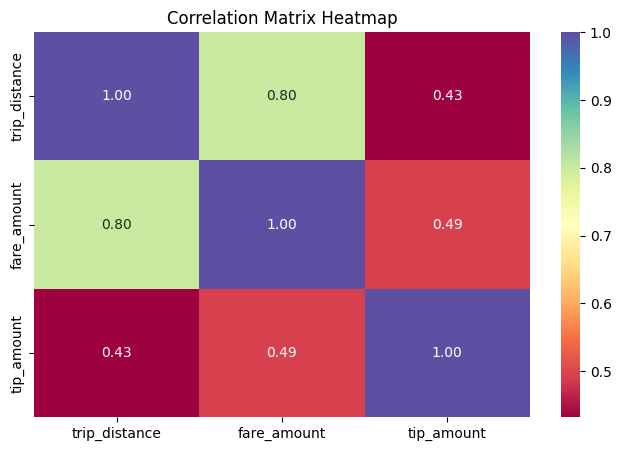

In [15]:
# Select relevant columns
corr_cols = ['trip_distance', 'fare_amount', 'tip_amount']
corr_matrix = df[corr_cols].corr(method='pearson')  # or 'spearman'

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


# Bonus Tasks (Optional for Extra Credit)

 • Create a time series plot of trip
 • Analyze how fare
 count per day or hour.
 amount varies with time of day (rush hours).
 • Map most common pickup/dropoff zones (if geo-data or zone IDs are mapped).

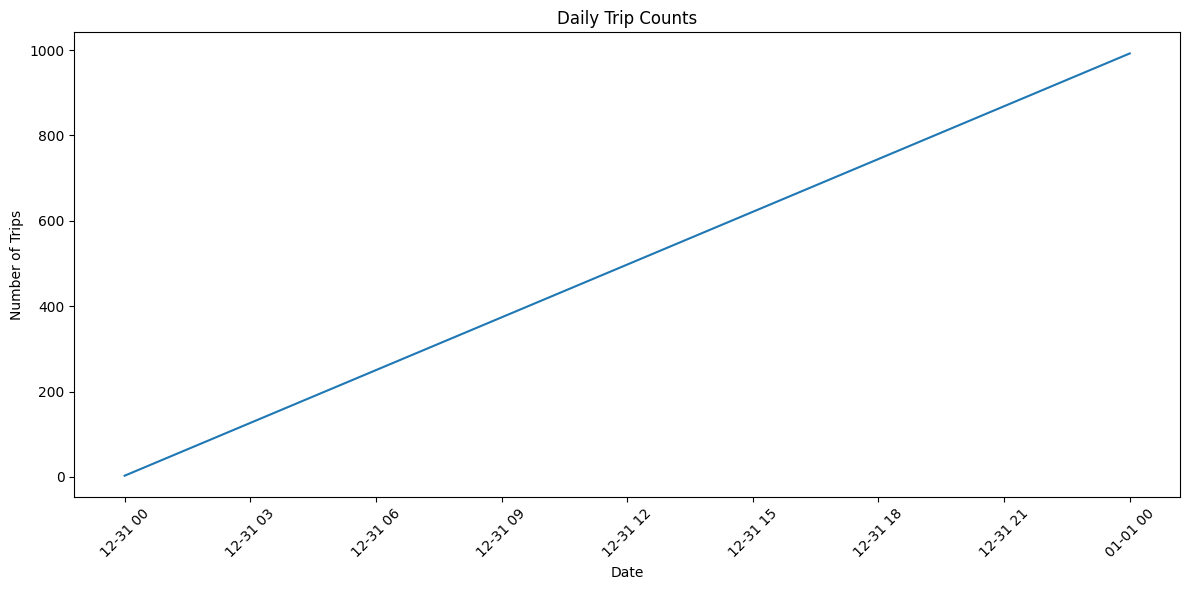

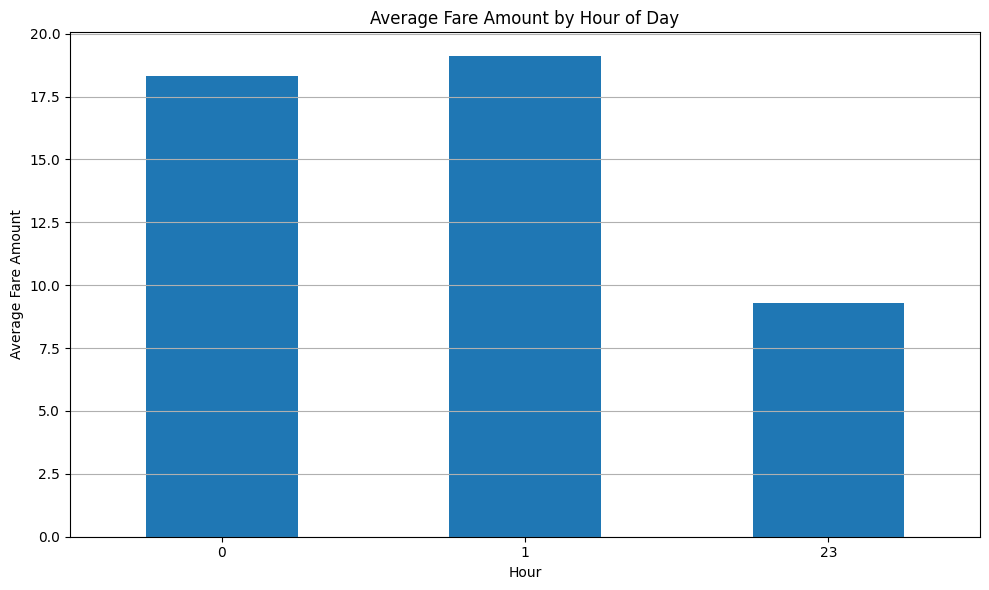

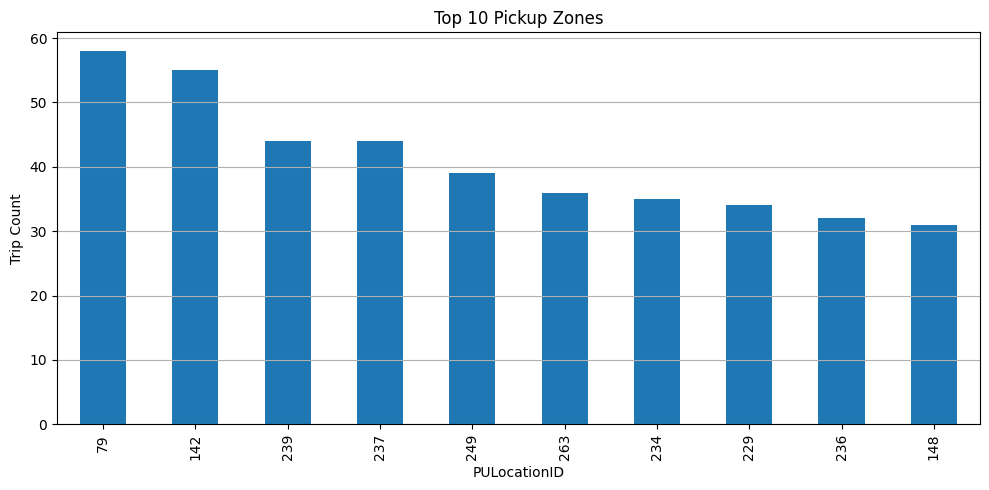

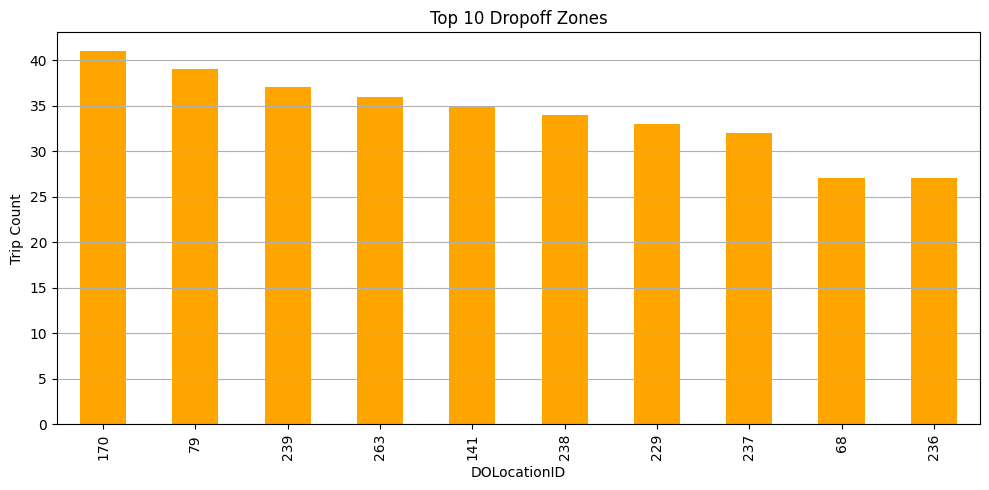

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("yellow_tripdata_sample.csv")

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

df = df.dropna(subset=['tpep_pickup_datetime'])

df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

daily_trip_counts = df.groupby('pickup_date').size()

plt.figure(figsize=(12, 6))
daily_trip_counts.plot()
plt.title("Daily Trip Counts")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

hourly_fare_avg = df.groupby('pickup_hour')['fare_amount'].mean()

plt.figure(figsize=(10, 6))
hourly_fare_avg.plot(kind='bar')
plt.title("Average Fare Amount by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Fare Amount")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

pickup_counts = df['PULocationID'].value_counts().head(10)
dropoff_counts = df['DOLocationID'].value_counts().head(10)

plt.figure(figsize=(10, 5))
pickup_counts.plot(kind='bar')
plt.title("Top 10 Pickup Zones")
plt.xlabel("PULocationID")
plt.ylabel("Trip Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
dropoff_counts.plot(kind='bar', color='orange')
plt.title("Top 10 Dropoff Zones")
plt.xlabel("DOLocationID")
plt.ylabel("Trip Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

